# Pymaceuticals Inc.
---

### Analysis

- The size of the tumor is proportional to weight of the mouse.
- There were slightly more males than females in this sampling.
- Of the four focused drugs, only Infubinol had any outliers.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete = mouse_data_complete.copy()
#dup = df[df.duplicated()]
#print(dup) 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicateRows = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
#duplicateRows
all_g989 = study_data_complete.loc[study_data_complete['Mouse ID']=='g989']
all_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# mouse_data_complete

cleaned_mouse_data = mouse_data_complete.drop(mouse_data_complete.loc[mouse_data_complete['Mouse ID']=='g989'].index,)


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = len(cleaned_mouse_data["Mouse ID"].unique())
mouse_count_new

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_drug = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_drug = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_drug = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_drug = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_drug = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_tumor_drug = pd.DataFrame({
    "Tumor Vol Mean" : mean_tumor_drug,
    "Tumor Vol Median" : median_tumor_drug,
    "Tumor Vol Variance" : variance_tumor_drug,
    "Tumor Vol Stand Dev" : std_tumor_drug,
    "Tumor Vol SEM" : sem_tumor_drug,
})

#Tumor Description Sample Print
summary_tumor_drug.head(10)

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Stand Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

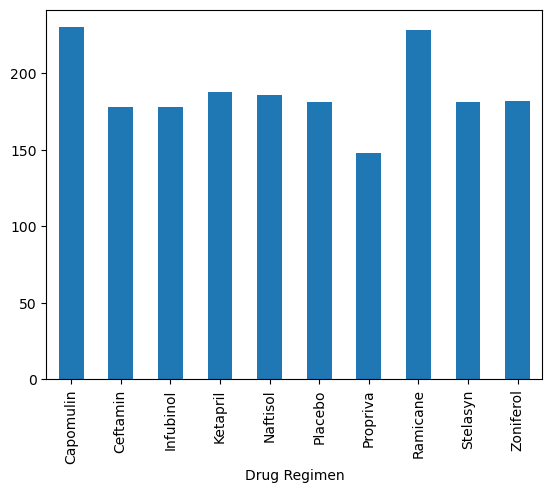

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimens = cleaned_mouse_data.groupby(by = "Drug Regimen").size()
regimens.plot(kind="bar")
plt.show()

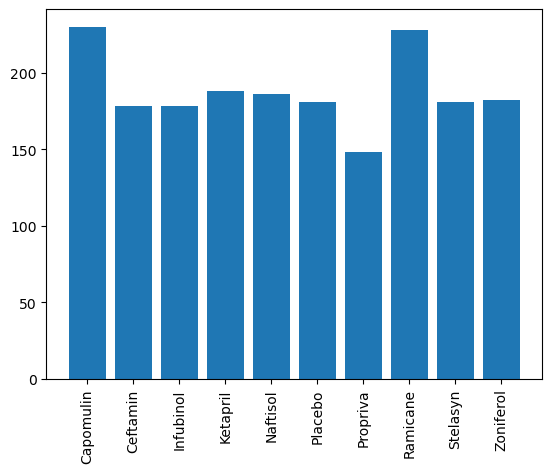

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimens.index.values, regimens.values)
plt.xticks(rotation=90)
plt.show()

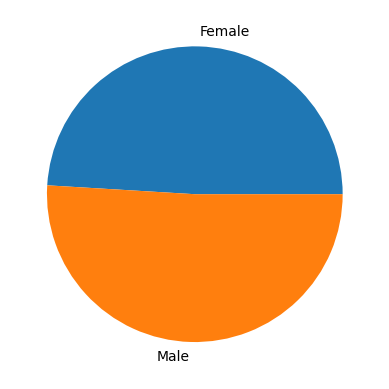

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_mouse_data.groupby(by = "Sex").size()
sex.plot(kind="pie")
plt.show()

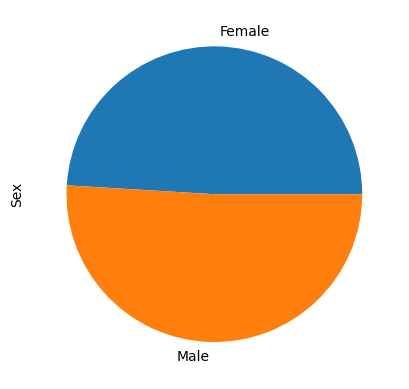

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex.index.values)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
focused_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
max_time=pd.pivot_table(cleaned_mouse_data, values=['Drug Regimen', 'Timepoint', ], index='Mouse ID', aggfunc="max")
max_time


,Drug Regimen,Timepoint
Mouse ID,,
a203,Infubinol,45
a251,Infubinol,45
a262,Placebo,45
a275,Ceftamin,45
a366,Stelasyn,30
...,...,...
z435,Propriva,10
z578,Ramicane,45
z581,Infubinol,45


In [16]:
# Filter to only the focused regimen drugs
curated_treatments =max_time.loc[max_time['Drug Regimen'].isin(focused_regimens)]
curated_treatments.reset_index()

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a275,Ceftamin,45
3,a411,Ramicane,45
4,a444,Ramicane,45
...,...,...,...
95,y769,Ceftamin,45
96,y793,Capomulin,45
97,y865,Ceftamin,45
98,z578,Ramicane,45


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_vol_time = pd.merge(curated_treatments, cleaned_mouse_data, on=["Drug Regimen","Mouse ID","Timepoint"],how="left")
# print(max_vol_time)
max_vol_time

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Infubinol,a203,45,67.973419,2,Female,20,23
1,Infubinol,a251,45,65.525743,1,Female,21,25
2,Ceftamin,a275,45,62.999356,3,Female,20,28
3,Ramicane,a411,45,38.407618,1,Male,3,22
4,Ramicane,a444,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
95,Ceftamin,y769,45,68.594745,4,Female,6,27
96,Capomulin,y793,45,31.896238,2,Male,17,17
97,Ceftamin,y865,45,64.729837,3,Male,23,26
98,Ramicane,z578,45,30.638696,0,Male,11,16


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_groups = max_vol_time.groupby("Drug Regimen")
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug,regimen in drug_groups:
    final_tumor_vol = regimen['Tumor Volume (mm3)']
    # add subset 
    tumor_vol.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


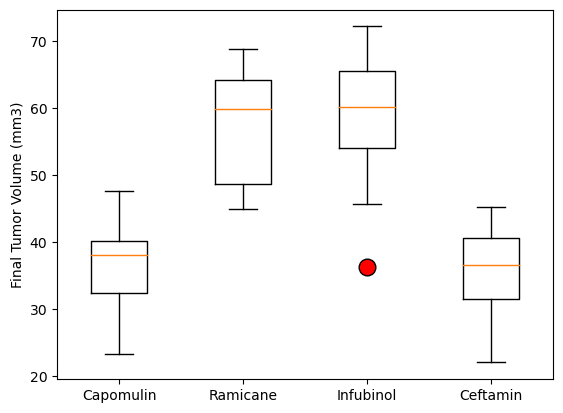

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = focused_regimens,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

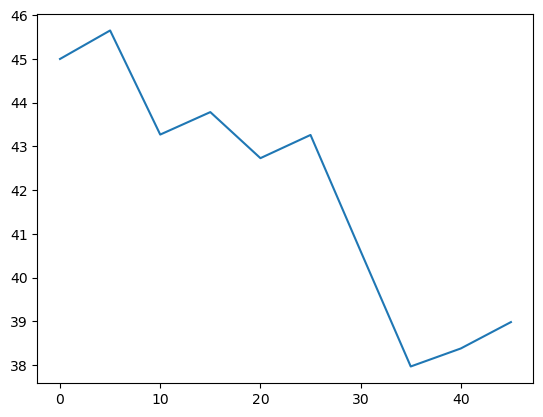

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_=cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen']=='Capomulin']

mouse=capo_.loc[capo_['Mouse ID']=='b128']
y_axis=mouse['Tumor Volume (mm3)']
x_axis=mouse['Timepoint']
plt.plot(x_axis, y_axis)

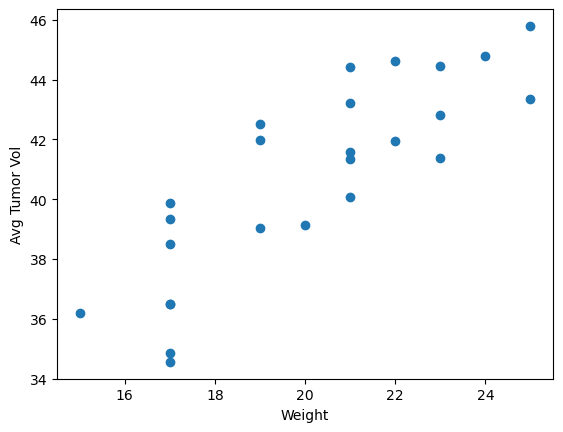

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo=cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen']=='Capomulin']
av_tumor_vol=capo.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)', ]].mean()
av_tumor_vol
plt.scatter(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Vol')
plt.show()

## Correlation and Regression

the stat and p value are as follows: SignificanceResult(statistic=0.8483796475850719, pvalue=8.473016588915299e-08)


C:\Users\kathl\AppData\Local\Temp\ipykernel_44040\1430159856.py:3: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  correlation_co = st.stats.spearmanr(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])


Text(0, 0.5, 'Avg Tumor Vol')

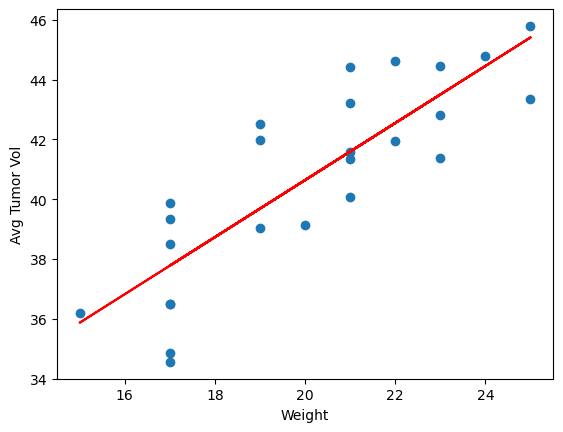

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_co = st.stats.spearmanr(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])
print(f'the stat and p value are as follows: {correlation_co}')

lin_reg_model=st.linregress(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])
# print(lin_reg_model)
y_ = av_tumor_vol['Weight (g)']*lin_reg_model[0]+lin_reg_model[1]
plt.scatter(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])
plt.plot(av_tumor_vol['Weight (g)'],y_, color="red")
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Vol')